In [10]:
import matplotlib.pyplot as plt
import os
import numpy as np
from utils import read_data

In [11]:
folderName = "2023-12-05-21-53-54"

cwd = os.getcwd()
folderPath = os.path.join(cwd, "o1_pfc_train", folderName)

data_pickle, data_json = read_data(folderPath)
data = data_pickle["data"]
tArray = data_pickle["tArray"]
nx = data_json["s1"]["n"]
dx = data_json["s1"]["dx"]
L = data_json["s1"]["L"]
tStart = data_json["s1"]["tStart"]
tEnd = data_json["s1"]["tEnd"]
dt = data_json["s1"]["dt"]
mTotal = data_json["s1"]["mTotal"]

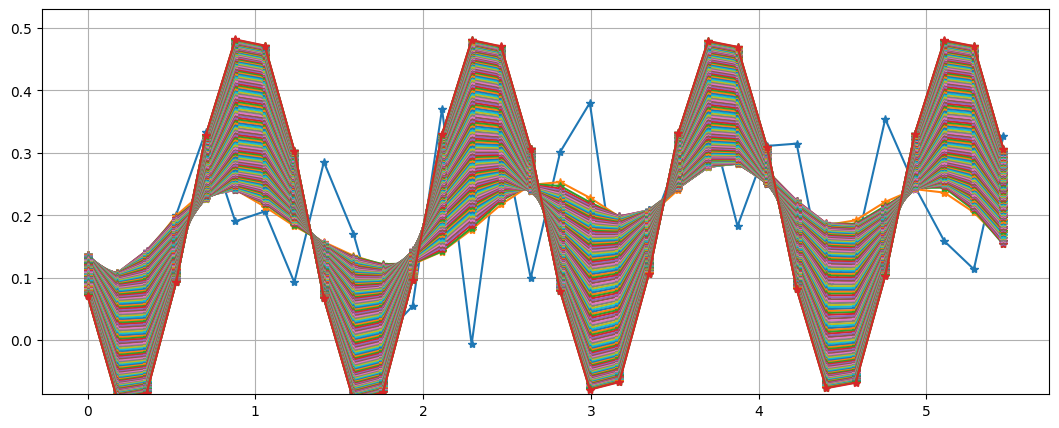

In [12]:
ms = np.arange(0, mTotal - 1, 3)

x = np.linspace(0, 2 * np.pi - dx, nx)
y = data[-1, :]

minV = data[-1, :].min()
maxV = data[-1, :].max()
minV = minV - minV * 0.1
maxV = maxV + maxV * 0.1
x = np.linspace(0, 2 * np.pi - dx, nx)
figsize = (13, 5)
plt.figure(figsize=figsize)

for m in ms:
    t = tArray[m - 1]
    y = data[m, :]
    plt.plot(x, np.real(y), "*-")

# plt.title(f'm = {m}, t={t}')
plt.ylim([minV, maxV])
plt.grid(True)